Steps:

Offline:
1.prepare a kusto query to download time series of a rollout progression
  - e.g. scoped by a rolloutId, rolloutLabel, buildLabel, etc. (provide examples)
  - select one or a set of signals to define the "regress cnt"
  - caution: 
    - start time of each one, whether truncated by 90d limit of kusto
    - handle timeout/memory overflow/throttle (resolved by using follower db) issue for each label
2.download these timeseries into a folder
3.pass the folder address, maxLimit, to the percentile matrix generator
  - generate matrix
  - generate report

Online serving:
1.enable model to consume a percentile matrix
  - for any given deployedCnt, have a dynamic threshold for any specific signal/set
  - write logic when deployedCnt is greater than maxLimit
2.check in percentile matrix to PFGold
3.check in model config, e.g. specs:
  - 

In [4]:
#!pip3 install matplotlib
!pip3 install pandas

     |████████████████████████████████| 11.6 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 5.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/songxu/PycharmProjects/Machine_Learning/venv/bin/python3 -m pip install --upgrade pip' command.


In [9]:
import PercentileModel
import os
import pandas as pd
import importlib
importlib.reload(PercentileModel)

<module 'PercentileModel' from '/Users/songxu/PycharmProjects/Machine_Learning/PercentileModel/PercentileModel.py'>

Percentile Model will:
1. Generate a percentileMatrix
2. Generate reports

In [11]:
# Local configs
workingFolderPath = r"/Users/songxu/DataRepo/PercentileModel"
tsDataFilePath = os.path.join(workingFolderPath, "input/allDf.csv")

In [12]:
model = PercentileModel.PercentileModel(workingFolderPath)
inputData = pd.read_csv(tsDataFilePath)

In [14]:
inputData.shape
# allDf = pd.DataFrame()
# for dataFileName in os.listdir(tsDataFolderPath):
#     dataFilePath = os.path.join(tsDataFolderPath, dataFileName)
#     curDf = pd.read_csv(dataFilePath)
#     allDf = allDf.append(curDf)
# print(allDf.shape)
# print(allDf.head(1))

# allDf.rename(columns={'totalMonitoredNode': 'totalTargetCnt', 'totalRegressedCount': 'regressTargetCnt_0.4', 'buildLabelPerSvc': 'rolloutLabel'}, inplace=True)

(17239, 5)

minNumRegress 0 at minTotalCntAtMinRegress 7604


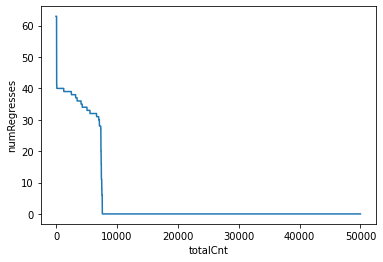

In [27]:
model.fit(allDf) #todo: create artifacts_data